In [ ]:
!pip install git+https://github.com/scikit-learn-contrib/py-earth@v0.2dev

  Cloning https://github.com/scikit-learn-contrib/py-earth (to revision v0.2dev) to /tmp/pip-req-build-jwb0gpy1
  Running command git clone -q https://github.com/scikit-learn-contrib/py-earth /tmp/pip-req-build-jwb0gpy1
  Running command git checkout -b v0.2dev --track origin/v0.2dev
  Switched to a new branch 'v0.2dev'
  Branch 'v0.2dev' set up to track remote branch 'v0.2dev' from 'origin'.
  Created wheel for sklearn-contrib-py-earth: filename=sklearn_contrib_py_earth-0.1.0+16.g400f84d-cp37-cp37m-linux_x86_64.whl size=3997295 sha256=d1a6ed82e59d7b6fc2ca1502e4f8f4aacdbf4648659714fcc97047d857c79a89
  Stored in directory: /tmp/pip-ephem-wheel-cache-pvp7a1f_/wheels/ea/8b/b6/27bdb1192dceac9e3a52df85aada60948fb56ba0795ec564c5
Successfully built sklearn-contrib-py-earth


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from pyearth import Earth
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [3]:
!gdown https://drive.google.com/uc?id=15j64TKndj7Yw1ixiw1DS7XmyByLIgoFt

Downloading...
From: https://drive.google.com/uc?id=15j64TKndj7Yw1ixiw1DS7XmyByLIgoFt
To: /content/INFY.csv
100% 228k/228k [00:00<00:00, 67.3MB/s]


In [4]:
data=pd.read_csv("INFY.csv")

In [5]:
data = data.set_index('Date')

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
02-01-2004,3.023750,3.141563,2.992188,3.103125,2.222448,13360000
05-01-2004,3.142500,3.203125,3.132813,3.165625,2.267211,12140800
06-01-2004,3.130313,3.171875,3.076563,3.135938,2.245949,10416000
07-01-2004,3.167188,3.181250,3.048438,3.124375,2.237667,11984000
08-01-2004,3.156250,3.193125,3.065313,3.080625,2.206333,13427200


In [6]:
data.dropna(how='any', inplace=True)

## ML Regression

In [7]:
#split into train and validation

length_train = 3774
train = data.iloc[:length_train,:] # training data from 2004-2018
test = data.iloc[length_train:,: ] # testing data on 2019

X_train = train.drop(['Close'], axis=1)
y_train = train['Close']
X_test = test.drop(['Close'], axis=1)
y_test = test['Close']

### Random Forest

In [8]:
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

y_pred = rfmodel.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", round(rmse, 4))

RMSE Score : 0.4518


([], <a list of 0 Text major ticklabel objects>)

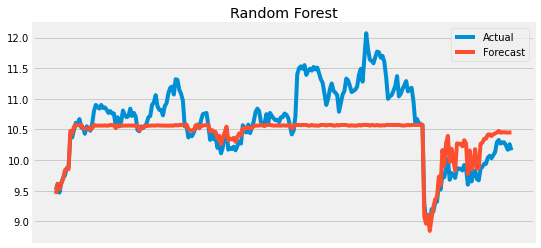

In [10]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('Random Forest')
plt.legend()
plt.xticks([])

### Gradient Boost

In [11]:
gbmodel = GradientBoostingRegressor()
gbmodel.fit(X_train, y_train)

y_pred = gbmodel.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", round(rmse, 4))

RMSE Score : 0.4509


([], <a list of 0 Text major ticklabel objects>)

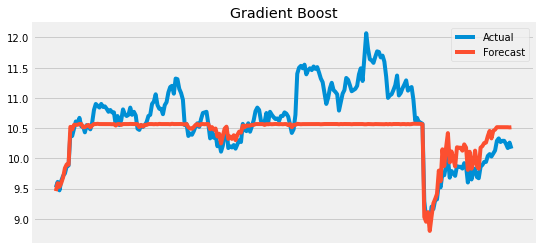

In [13]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('Gradient Boost')
plt.legend()
plt.xticks([])

### XGBoost

In [14]:
xgmodel = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10,seed=123)

xgmodel.fit(X_train, y_train)

y_pred = xgmodel.predict(X_test)

[09:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", round(rmse, 4))

RMSE Score : 4.087


([], <a list of 0 Text major ticklabel objects>)

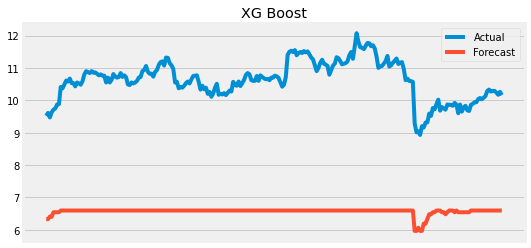

In [16]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('XG Boost')
plt.legend()
plt.xticks([])

### K-Nearest Neighbours

In [17]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
knnmodel = neighbors.KNeighborsRegressor()
knnmodel = GridSearchCV(knnmodel, params, cv=5)

knnmodel.fit(X_train, y_train)
y_pred = knnmodel.predict(X_test)

In [18]:
knnmodel.best_params_

{'n_neighbors': 10}

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", round(rmse, 4))

RMSE Score : 4.0988


([], <a list of 0 Text major ticklabel objects>)

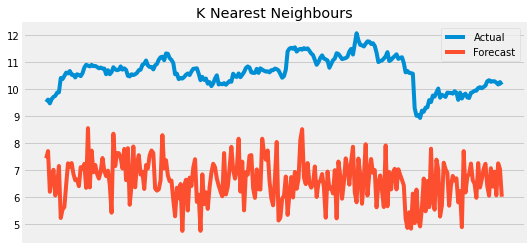

In [20]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('K Nearest Neighbours')
plt.legend()
plt.xticks([])

### Linear Regression

In [21]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

y_pred = lrmodel.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", round(rmse, 4))

RMSE Score : 0.046


In [23]:
y_test

Date
31-12-2018     9.52
02-01-2019     9.61
03-01-2019     9.47
04-01-2019     9.63
07-01-2019     9.71
              ...  
23-12-2019    10.29
24-12-2019    10.24
26-12-2019    10.17
27-12-2019    10.26
30-12-2019    10.16
Name: Close, Length: 252, dtype: float64

In [24]:
y_pred

array([ 9.46296569,  9.66041193,  9.52682011,  9.66514176,  9.76083576,
        9.77427916,  9.85155183,  9.8110646 , 10.52311187, 10.32454511,
       10.50132816, 10.61521522, 10.58565584, 10.66076869, 10.5492501 ,
       10.46923889, 10.47697428, 10.49584386, 10.52105446, 10.4751313 ,
       10.56774294, 10.79454225, 10.88859517, 10.84558165, 10.89556516,
       10.89516363, 10.87561327, 10.86832008, 10.83747518, 10.79697738,
       10.8120907 , 10.71922518, 10.73388397, 10.48620792, 10.71160426,
       10.53976769, 10.65180938, 10.86827378, 10.69327286, 10.67934966,
       10.72846001, 10.82102911, 10.72950532, 10.73619196, 10.73045077,
       10.57468487, 10.43353387, 10.54136189, 10.49981242, 10.55304435,
       10.56642512, 10.75826883, 10.72288381, 10.88421702, 10.96301891,
       11.05485483, 10.9673036 , 10.81478913, 10.81495302, 10.73757992,
       10.88007918, 11.00608279, 11.11612034, 11.19868385, 11.23827635,
       11.07555873, 11.3080245 , 11.35634069, 11.19173135, 11.10

([], <a list of 0 Text major ticklabel objects>)

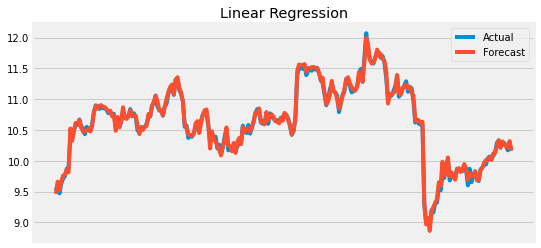

In [25]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Forecast')
plt.title('Linear Regression')
plt.legend()
plt.xticks([])

### MARS

In [26]:
MARS_model = Earth(max_terms=500, max_degree=1)
MARS_model_fitted = MARS_model.fit(X_train, y_train)

y_pred = MARS_model_fitted.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Score :", round(rmse, 4))

RMSE Score : 0.0647


([], <a list of 0 Text major ticklabel objects>)

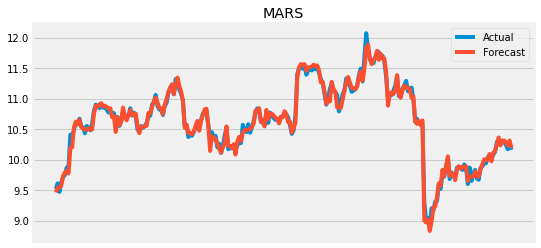

In [28]:
plt.rcParams['figure.figsize'] = (8,4)
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Forecast')
plt.title('MARS')
plt.legend()
plt.xticks([])

## ML Classification

In [ ]:
data['returns'] = 100 * data.Close.pct_change()

In [ ]:
# converting negative return values to 0 and positive values to 1 

data['CL'] = data['returns'].apply(lambda a:0 if a<0 else 1)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,returns,CL
Date,,,,,,,,
02-01-2004,3.023750,3.141563,2.992188,3.103125,2.222448,13360000,NaN,1
05-01-2004,3.142500,3.203125,3.132813,3.165625,2.267211,12140800,2.014099,1
06-01-2004,3.130313,3.171875,3.076563,3.135938,2.245949,10416000,-0.937793,0
07-01-2004,3.167188,3.181250,3.048438,3.124375,2.237667,11984000,-0.368725,0
08-01-2004,3.156250,3.193125,3.065313,3.080625,2.206333,13427200,-1.400280,0


In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
returns      1
CL           0
dtype: int64

In [ ]:
data.dropna(how='any', inplace=True)

In [ ]:
data.iloc[3774:3776,:]

,Open,High,Low,Close,Adj Close,Volume,returns,CL
Date,,,,,,,,
02-01-2019,9.50,9.73,9.47,9.61,9.083818,9818900,0.945378,1
03-01-2019,9.55,9.59,9.47,9.47,8.951485,9404900,-1.456816,0


In [ ]:
#split into train and validation

length_train = 3774
train = data.iloc[:length_train,:] # training data from 2004-2018
test = data.iloc[length_train:,: ] # testing data on 2019

train.shape, test.shape

((3774, 8), (251, 8))

In [ ]:
X_train = train.drop(['CL'], axis=1)
y_train = train['CL']
X_test = test.drop(['CL'], axis=1)
y_test = test['CL']

### Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

In [ ]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 1.0


### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 0.5538


### Random Forest

In [ ]:
rnf = RandomForestClassifier(max_depth=3)
rnf.fit(X_train, y_train)

y_pred = rnf.predict(X_test)

In [ ]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 1.0


### XG Boost

In [ ]:
xgb = XGBClassifier(max_depth=3)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [ ]:
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 1.0


## PyCaret Classification

In [ ]:
!pip install pycaret

# need to restart runtime after installing

In [ ]:
from pycaret.classification import *

grid = setup(data = data, target = 'CL')

,Description,Value
0,session_id,8735
1,Target,CL
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4025, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.018
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.524
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.020
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.209
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.091
et,Extra Trees Classifier,0.9837,0.9990,0.9857,0.9831,0.9843,0.9673,0.9674,0.520
ridge,Ridge Classifier,0.9712,0.0000,0.9918,0.9550,0.9729,0.9423,0.9434,0.019
lda,Linear Discriminant Analysis,0.9712,0.9988,0.9918,0.9550,0.9729,0.9423,0.9434,0.019
qda,Quadratic Discriminant Analysis,0.9510,0.9978,0.9925,0.9202,0.9548,0.9015,0.9050,0.020
nb,Naive Bayes,0.5286,0.5155,0.8908,0.5274,0.6624,0.0283,0.0446,0.017


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8735, splitter='best')

## PyCaret Regression

In [ ]:
data2=pd.read_csv("INFY.csv")

In [ ]:
data2 = data2.set_index('Date')

In [ ]:
from pycaret.regression import *

reg1 = setup(data = data2, target = 'Close')

,Description,Value
0,session_id,7676
1,Target,Close
2,Original Data,"(4026, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2818, 2)"


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1795,0.0598,0.2443,0.9862,0.0295,0.0260,0.185
lightgbm,Light Gradient Boosting Machine,0.1800,0.0632,0.2509,0.9855,0.0301,0.0259,0.065
rf,Random Forest Regressor,0.1771,0.0665,0.2574,0.9847,0.0310,0.0254,0.741
et,Extra Trees Regressor,0.1776,0.0683,0.2610,0.9843,0.0315,0.0254,0.589
ada,AdaBoost Regressor,0.2172,0.0727,0.2695,0.9833,0.0357,0.0342,0.152
dt,Decision Tree Regressor,0.2059,0.1085,0.3289,0.9750,0.0395,0.0294,0.023
lr,Linear Regression,0.2869,0.1266,0.3555,0.9710,0.0523,0.0480,0.015
ridge,Ridge Regression,0.2869,0.1266,0.3555,0.9710,0.0523,0.0480,0.017
lar,Least Angle Regression,0.2869,0.1266,0.3555,0.9710,0.0523,0.0480,0.016
br,Bayesian Ridge,0.2869,0.1266,0.3555,0.9710,0.0523,0.0480,0.014


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7676, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)